# Handwriting Recognition
Author: Cynthia Loh <br>
CWID: 10450298 <br>
Due Date: 12/16/21 <br>
Pledge: I pledge my honor that I have abided by the Stevens Honor System.

In [1]:
!pip install idx2numpy
import idx2numpy

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Task 1 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Task 2
!pip install tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Task 3
!pip install opencv-python
import cv2
import os
from scipy import ndimage, misc

In [4]:
train_images_file = './data/train-images.idx3-ubyte' 
train_labels_file = './data/train-labels.idx1-ubyte'
test_images_file = './data/t10k-images.idx3-ubyte'
test_labels_file = './data/t10k-labels.idx1-ubyte'

train_images = idx2numpy.convert_from_file(train_images_file)
train_labels = idx2numpy.convert_from_file(train_labels_file)
test_images = idx2numpy.convert_from_file(test_images_file)
test_labels = idx2numpy.convert_from_file(test_labels_file)

In [5]:
print("train images shape: " + str(train_images.shape))
print("train labels shape: " + str(train_labels.shape))
print("test images shape: " + str(test_images.shape))
print("test labels shape: " + str(test_labels.shape))


train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


In [6]:
train_data=train_images.reshape(60000,28*28)
test_data=test_images.reshape(10000,28*28)
print("train data shape: " + str(train_data.shape))
print("test data shape: " + str(test_data.shape))

train data shape: (60000, 784)
test data shape: (10000, 784)


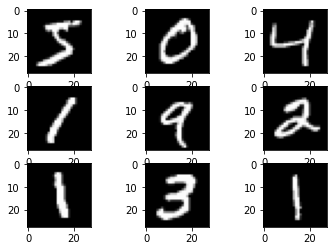

labels: [5 0 4 1 9 2 1 3 1]


In [7]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()
print("labels: " + str(train_labels[:9]))

## Task #1
Build a number of non-deep learning based classifiers using all pixels as features for handwriting recognition. 
<br>
The techniques used are 
- Logistic Regression
- SVM
- Decision Tree
- Random Forest

#### Scale the data

In [8]:
scaler = MinMaxScaler()
scaler.fit(train_data)
X_train = scaler.transform(train_data)
X_test = scaler.transform(test_data)

#### Logistic Regression
General description: Logistic Regression is a classification model that acts very similarly to linear regression. Logistic regression is most commonly used for binary classification. For multiclass classification, the logistic model uses a cross-entropy loss function. Logistic regression predicts a dependent data variable by analysing the relationship between other independent variables. 

Pros: 
- Fast and relatively simple classification method
- Good accuracy for simple datasets
- Provides a measure of how appropriate a predictor is and provides its direction of association

Cons: 
- Cannot be used for non-linear classification problems
- Colinearity and outliers negatively affact the accuracy of logistic regression model
- Difficult to obtain complex relationships using logistic regression

Suitability for handwriting recognition: Logistic regression is suitable for handwriting recognition because it finds which pixels are most important for the computation of each digit. Digits such as 0 and 1 are more easily distinguishable than the others that share more pixels in common and have more complex shapes. 

In [9]:
# Logistic Regression model

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [10]:
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(test_labels, lr_pred)

#### SVM
General description: SVM stands for Supportive Vector Machine. SVM is an extension of the Perceptron developed by Rosenblatt. SVM works by finding a hyperlane between the data of the classes. SVM finds the best hyperplane by finding the points closest to this line from both classes, these are called support vectors. The distance between the line and the support vectors is called the margin and the optimal hyperplane is the one where the margin is maximized.

Pros: 
- It works very well with a clear margin of separation
- Effective in high dimensional spaces
- Memory efficient
- Effective when the number of dimensions is greater than the number of samples

Cons: 
- Does not directly provide probability estimates
- Does not perform well when classes overlap (noisy data set)
- Low effiency when the data set is too large because the required training time is higher

Suitability for handwriting recognition: Its accuracy depends on the kernel used. For example, when using a linear kernel, the accuracy found was around 92% while a polynomial kernel gives an accuracy score of about 98%. This is because the shapes of the digits are not always linear and many of the digits are curved and rounded. 

In [11]:
# SVM model

svm_model = svm.SVC(kernel='poly',max_iter=10000)
svm_model.fit(X_train, train_labels)

SVC(kernel='poly', max_iter=10000)

In [12]:
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(test_labels, svm_pred)

#### Decision Tree
General description: A supervised learning technique by decision making used for both classification and regression. Decision trees, as the name suggests, builds a model in the shape of a tree where it breaks down the data set into smaller subsets based a question posed by observations about the item. The final result is a tree with decision nodes and leaf nodes. The decision node has two or more branches. Leaf nodes represent a classification or decision. 

Pros: 
- Requires less effort for data preprocessing as the data does not need normalization or scaling
- Missing values in the data does not considerably effect the building of the tree
- Very intuitive and easy to understand
- Robust to outliers

Cons: 
- Small change in data can cause instability in the decision tree
- Generally tends to overfit the data
- Not suitable for large datasets as it can grow too complex and overfit
- Not good at handling noisy data
- High variance in output

Suitability for handwriting recognition: Decision tree is not that suitable for handwriting recognition. The features that are used to determine a split are the pixels and by examining the intensity of one pixel, the decision tree determines which digit it is. It is not that effective because, as stated in the cons, small changes in the data can cause instability in the deicsion tree and there is a large variety of handwriting which can throw off the model. There is also a lot of overlap between the digits and decision tree is not good at handling noisy data.

In [14]:
# Decision Tree model

dt_model = DecisionTreeClassifier()
dt_model.fit(train_data, train_labels)

DecisionTreeClassifier()

In [15]:
dt_pred = dt_model.predict(test_data)
dt_acc = accuracy_score(test_labels, dt_pred)

#### Random Forest
General description: Random forest is a model that builds multiple decision trees based on different samples. Random Forest is efficient at handling both regression and classification although it does perform better, typically, for classification. To use the random forest algorithm, an ensemble function is needed to combine multiple models so predictions are made based on a colletion of models rather than a singular model. There are two types of ensemble methods: bagging and boosting. Bagging creates a different training subset from sample training data with replacement and the final output is based on majority voting. Boosting combines weak learners into strong learners by creating sequential modesl such that the final model has the highest accuracy.

Pros: 
- Better accuracy score compared to decision tree and other non-deep learning algorithms
- Requires less effort for data preprocessing as the data does not need normalization or scaling
- Missing values in the data does not considerably effect
- Suitable for large data sets
- A large amount of parameters to tweak to improve the model

Cons: 
- Risk of overfitting
- Biased towards variables with more values
- High parameter complexity

Suitability for handwriting recognition: Random forest is suitable for handwriting recognition and provides a high accuracy score. Random forest uses multiple decision trees to help improve accuracy. While a single decision tree searches for the most important feature to split the node, random forest searches for the best feature among a random subset of features to split the node. This additional randomness to the model creates a wider diversity and typically leads to higher accuracy.

In [17]:
# Random Forest model

rf_model = RandomForestClassifier()
rf_model.fit(train_data, train_labels)

RandomForestClassifier()

In [18]:
rf_pred = rf_model.predict(test_data)
rf_acc = accuracy_score(test_labels, rf_pred)

In [20]:
# Compare models
algos = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
acc = [lr_acc, svm_acc, dt_acc, rf_acc]
compare = {'Models': algos, 'Accuracy': acc}
res = pd.DataFrame(compare)
res

,Models,Accuracy
0,Logistic Regression,0.9256
1,SVM,0.9771
2,Decision Tree,0.8799
3,Random Forest,0.9700


## Task #2
Convolutional Neural Network

#### Data preprocessing

In [21]:
X_train2 = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_test2 = test_images.reshape(test_images.shape[0], 28, 28, 1)
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

y_train2 = to_categorical(train_labels)
y_test2 = to_categorical(test_labels)

# Normalize data
X_train2 /= 255
X_test2 /= 255

# create validation set from train set
X_train2, X_val, y_train2, y_val = train_test_split(X_train2, y_train2)

#### CNN Model

In [22]:
cnn = Sequential()

# layer 1
cnn.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D((2,2)))

# layer 2
cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D((2,2)))

# layer 3
cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D((2,2)))

# flatten layer
cnn.add(Flatten())

# FC layer
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# compile model 
opt = SGD(learning_rate=0.01, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [25]:
cnn.fit(X_train2, y_train2, batch_size=128, epochs=11, validation_data=(X_val, y_val))

Epoch 1/11
352/352 [==============================] - 57s 162ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0652 - val_accuracy: 0.9868
Epoch 2/11
352/352 [==============================] - 58s 165ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0.0615 - val_accuracy: 0.9881
Epoch 3/11
352/352 [==============================] - 57s 162ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0690 - val_accuracy: 0.9880
Epoch 4/11
352/352 [==============================] - 57s 163ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0672 - val_accuracy: 0.9886
Epoch 5/11
352/352 [==============================] - 57s 163ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0700 - val_accuracy: 0.9875
Epoch 6/11
352/352 [==============================] - 57s 161ms/step - loss: 0.0425 - accuracy: 0.9859 - val_loss: 0.0549 - val_accuracy: 0.9888
Epoch 7/11
352/352 [==============================] - 57s 163ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0592 - val_ac

In [26]:
test_loss, test_acc = cnn.evaluate(X_test2, y_test2)

313/313 [==============================] - 3s 10ms/step - loss: 0.0556 - accuracy: 0.9895


## Task #3


In [27]:
# input my 50 images of handwritten digits 0-9
# format them correctly to work with the models

path = './my_img'

my_img = []

for img_path in os.listdir(path):
    i = os.path.join(path, img_path)
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    im_resized = cv2.resize(img, (28,28), interpolation=cv2.INTER_LINEAR)
    im_resized = cv2.bitwise_not(im_resized)
    im_arr = np.array(im_resized)
    my_img.append(im_arr)

my_img = np.array(my_img)

In [28]:
# labels for my images
my_labels = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9]
my_labels = np.array(my_labels)

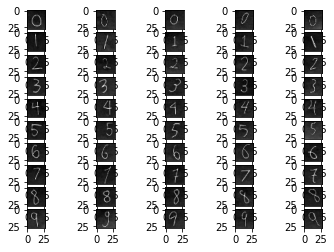

In [29]:
for i in range(50):
    plt.subplot(10, 5, 1+i)
    plt.imshow(my_img[i], cmap=plt.get_cmap('gray'))
plt.show()

In [30]:
print(my_labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


In [31]:
print("my_img shape: " + str(my_img.shape))
print("my_labels shape: " + str(my_labels.shape))

my_img shape: (50, 28, 28)
my_labels shape: (50,)


In [42]:
# change shape of my_img
X = my_img.reshape(50, 28*28)

print("X shape: " + str(X.shape))

X shape: (50, 784)


In [43]:
# Normalize the data
X_scaled = scaler.transform(X)

In [44]:
# Logistic Regression 
my_lr_pred = lr_model.predict(X_scaled)
my_lr_acc = accuracy_score(my_labels, my_lr_pred)

In [45]:
# SVM
my_svm_pred = svm_model.predict(X_scaled)
my_svm_acc = accuracy_score(my_labels, my_svm_pred)

In [46]:
# Decision Tree
my_dt_pred = dt_model.predict(X)
my_dt_acc = accuracy_score(my_labels, my_dt_pred)

In [47]:
# Random Forest
my_rf_pred = rf_model.predict(X)
my_rf_acc = accuracy_score(my_labels, my_rf_pred)

In [48]:
# CNN
# preprocess
X_cnn = my_img.reshape(my_img.shape[0], 28,28,1)
X_cnn = X_cnn.astype('float32')

y = to_categorical(my_labels)

# Normalize data
X_cnn /= 255


In [49]:
my_cnn_loss, my_cnn_acc = cnn.evaluate(X_cnn, y)

2/2 [==============================] - 0s 12ms/step - loss: 1.9853 - accuracy: 0.3200


In [50]:
# Compare models

algos = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'CNN']
acc = [my_lr_acc, my_svm_acc, my_dt_acc, my_rf_acc, my_cnn_acc]
compare = {'Models': algos, 'Accuracy': acc}
res = pd.DataFrame(compare)
res

,Models,Accuracy
0,Logistic Regression,0.12
1,SVM,0.14
2,Decision Tree,0.14
3,Random Forest,0.10
4,CNN,0.32
